# Importing standard libraries

In [36]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Seeding values
### This is done so that code values stay uniform

In [37]:
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Reading the data into a dataframe

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
file_path = '/content/drive/My Drive/DS340/cardio_train.csv'
df = pd.read_csv(file_path, sep=";")

#url = 'https://raw.githubusercontent.com/YoofKhaneja/Analyzing-Risk-of-CHD-with-Discriminative-NN/master/framingham.csv'
#hd = pd.read_csv(url)

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [40]:
# renaming some columns
df = df.rename(columns={'ap_hi': 'sys_bp', 'ap_lo': 'dys_bp'})


# making age variable from days to years
df['age'] = df['age'].apply(lambda x: round(x/365, 3))

In [41]:
df.head(10)

,id,age,gender,height,weight,sys_bp,dys_bp,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.392,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.874,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60.038,1,151,67.0,120,80,2,2,0,0,0,0
6,9,60.584,1,157,93.0,130,80,3,1,0,0,1,0
7,12,61.874,2,178,95.0,130,90,3,3,0,0,1,1
8,13,48.405,1,158,71.0,110,70,1,1,0,0,1,0
9,14,54.340,1,164,68.0,110,60,1,1,0,0,0,0


In [42]:
# creating dataset of just men
df_men = df[df['gender'] == 2]

# creating dataset of just women
df_women = df[df['gender'] == 1]

# **Exploratory Data Analysis**

**Gender split analysis**

gender
1    45530
2    24470
Name: count, dtype: int64


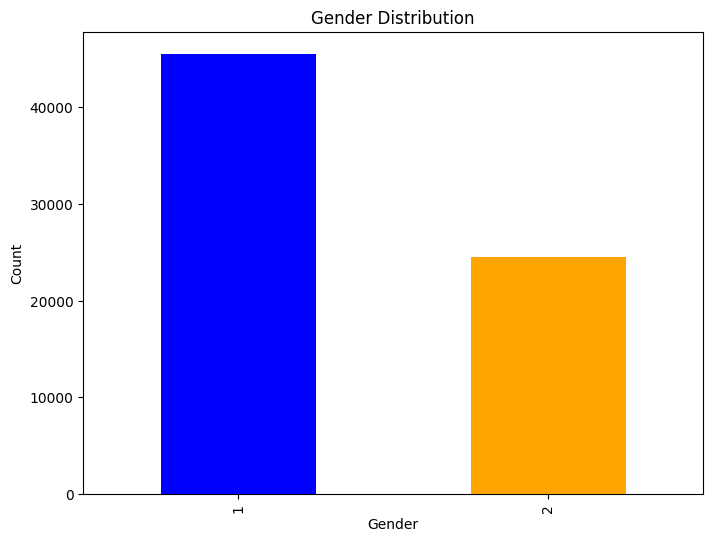

In [43]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

# Plotting
plt.figure(figsize=(8,6))
gender_counts.plot(kind='bar', color=['blue', 'orange'])


plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

*From this we can see that the gender split is pretty imbalanced. The difference in heart disease prediction by gender is something we want to investigate, specifically with which features impact a certain gender more than a the other.*

**Target variable analysis**

Total patients at risk of CHD:  34979
Total patients not at risk of CHD:  35021


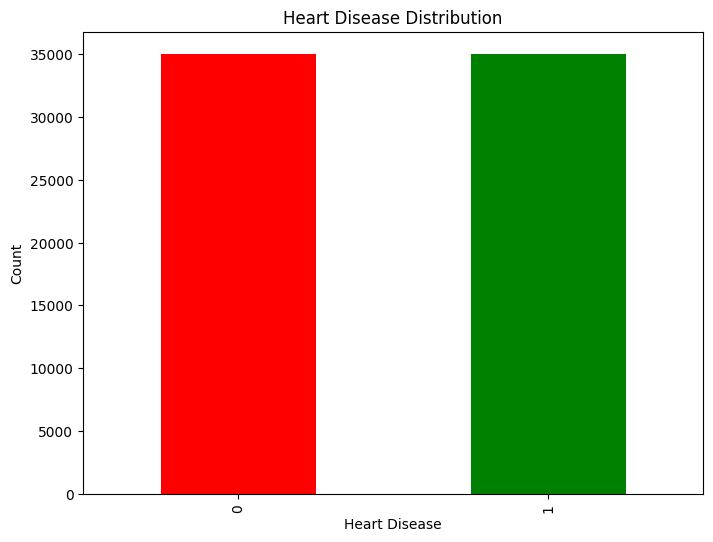

In [44]:
hd_counts = df['cardio'].value_counts()

from collections import Counter
tv_count = Counter(df['cardio'])
print('Total patients at risk of CHD: ', tv_count[1])
print('Total patients not at risk of CHD: ', tv_count[0])

# Plotting
plt.figure(figsize=(8,6))
hd_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Display the plot
plt.show()

*The heart disease target variable in this data set is much more balanced than the data set the authors used previously. This is good as it will prevent any bias in the model where it could just predict one of the variables for all predictions and still return a high accuracy.*

Total patients at risk of CHD:  12363
Total patients not at risk of CHD:  12107


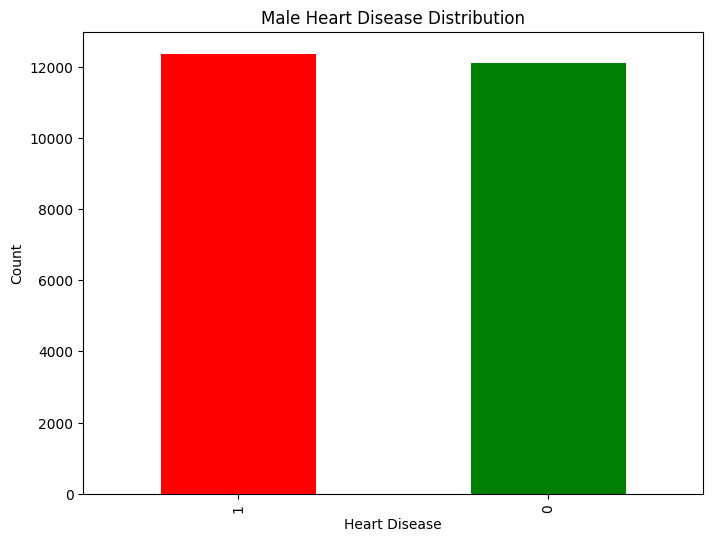

In [45]:
hd_counts = df_men['cardio'].value_counts()

from collections import Counter
tv_count = Counter(df_men['cardio'])
print('Total patients at risk of CHD: ', tv_count[1])
print('Total patients not at risk of CHD: ', tv_count[0])

# Plotting
plt.figure(figsize=(8,6))
hd_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Male Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Display the plot
plt.show()

*This graph shows even distribution of males with heart disease*

Total patients at risk of CHD:  22616
Total patients not at risk of CHD:  22914


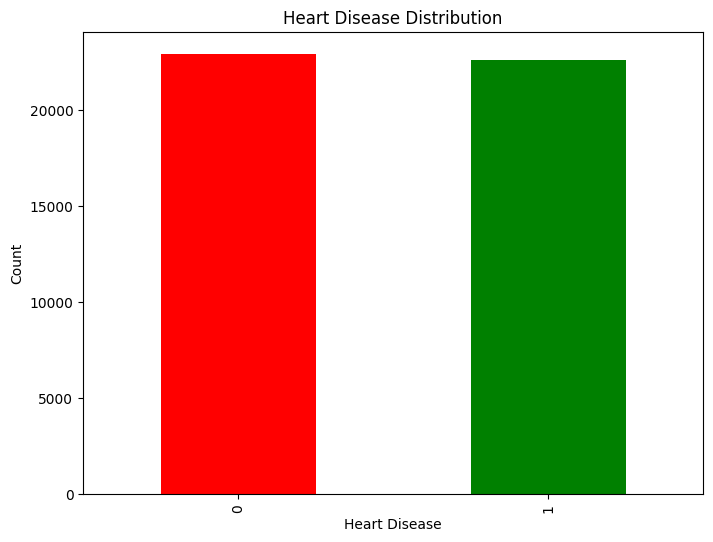

In [46]:
hd_counts = df_women['cardio'].value_counts()

from collections import Counter
tv_count = Counter(df_women['cardio'])
print('Total patients at risk of CHD: ', tv_count[1])
print('Total patients not at risk of CHD: ', tv_count[0])

# Plotting
plt.figure(figsize=(8,6))
hd_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Display the plot
plt.show()

*Even distribution of heart disease amongst women*

**Distribution of all features**

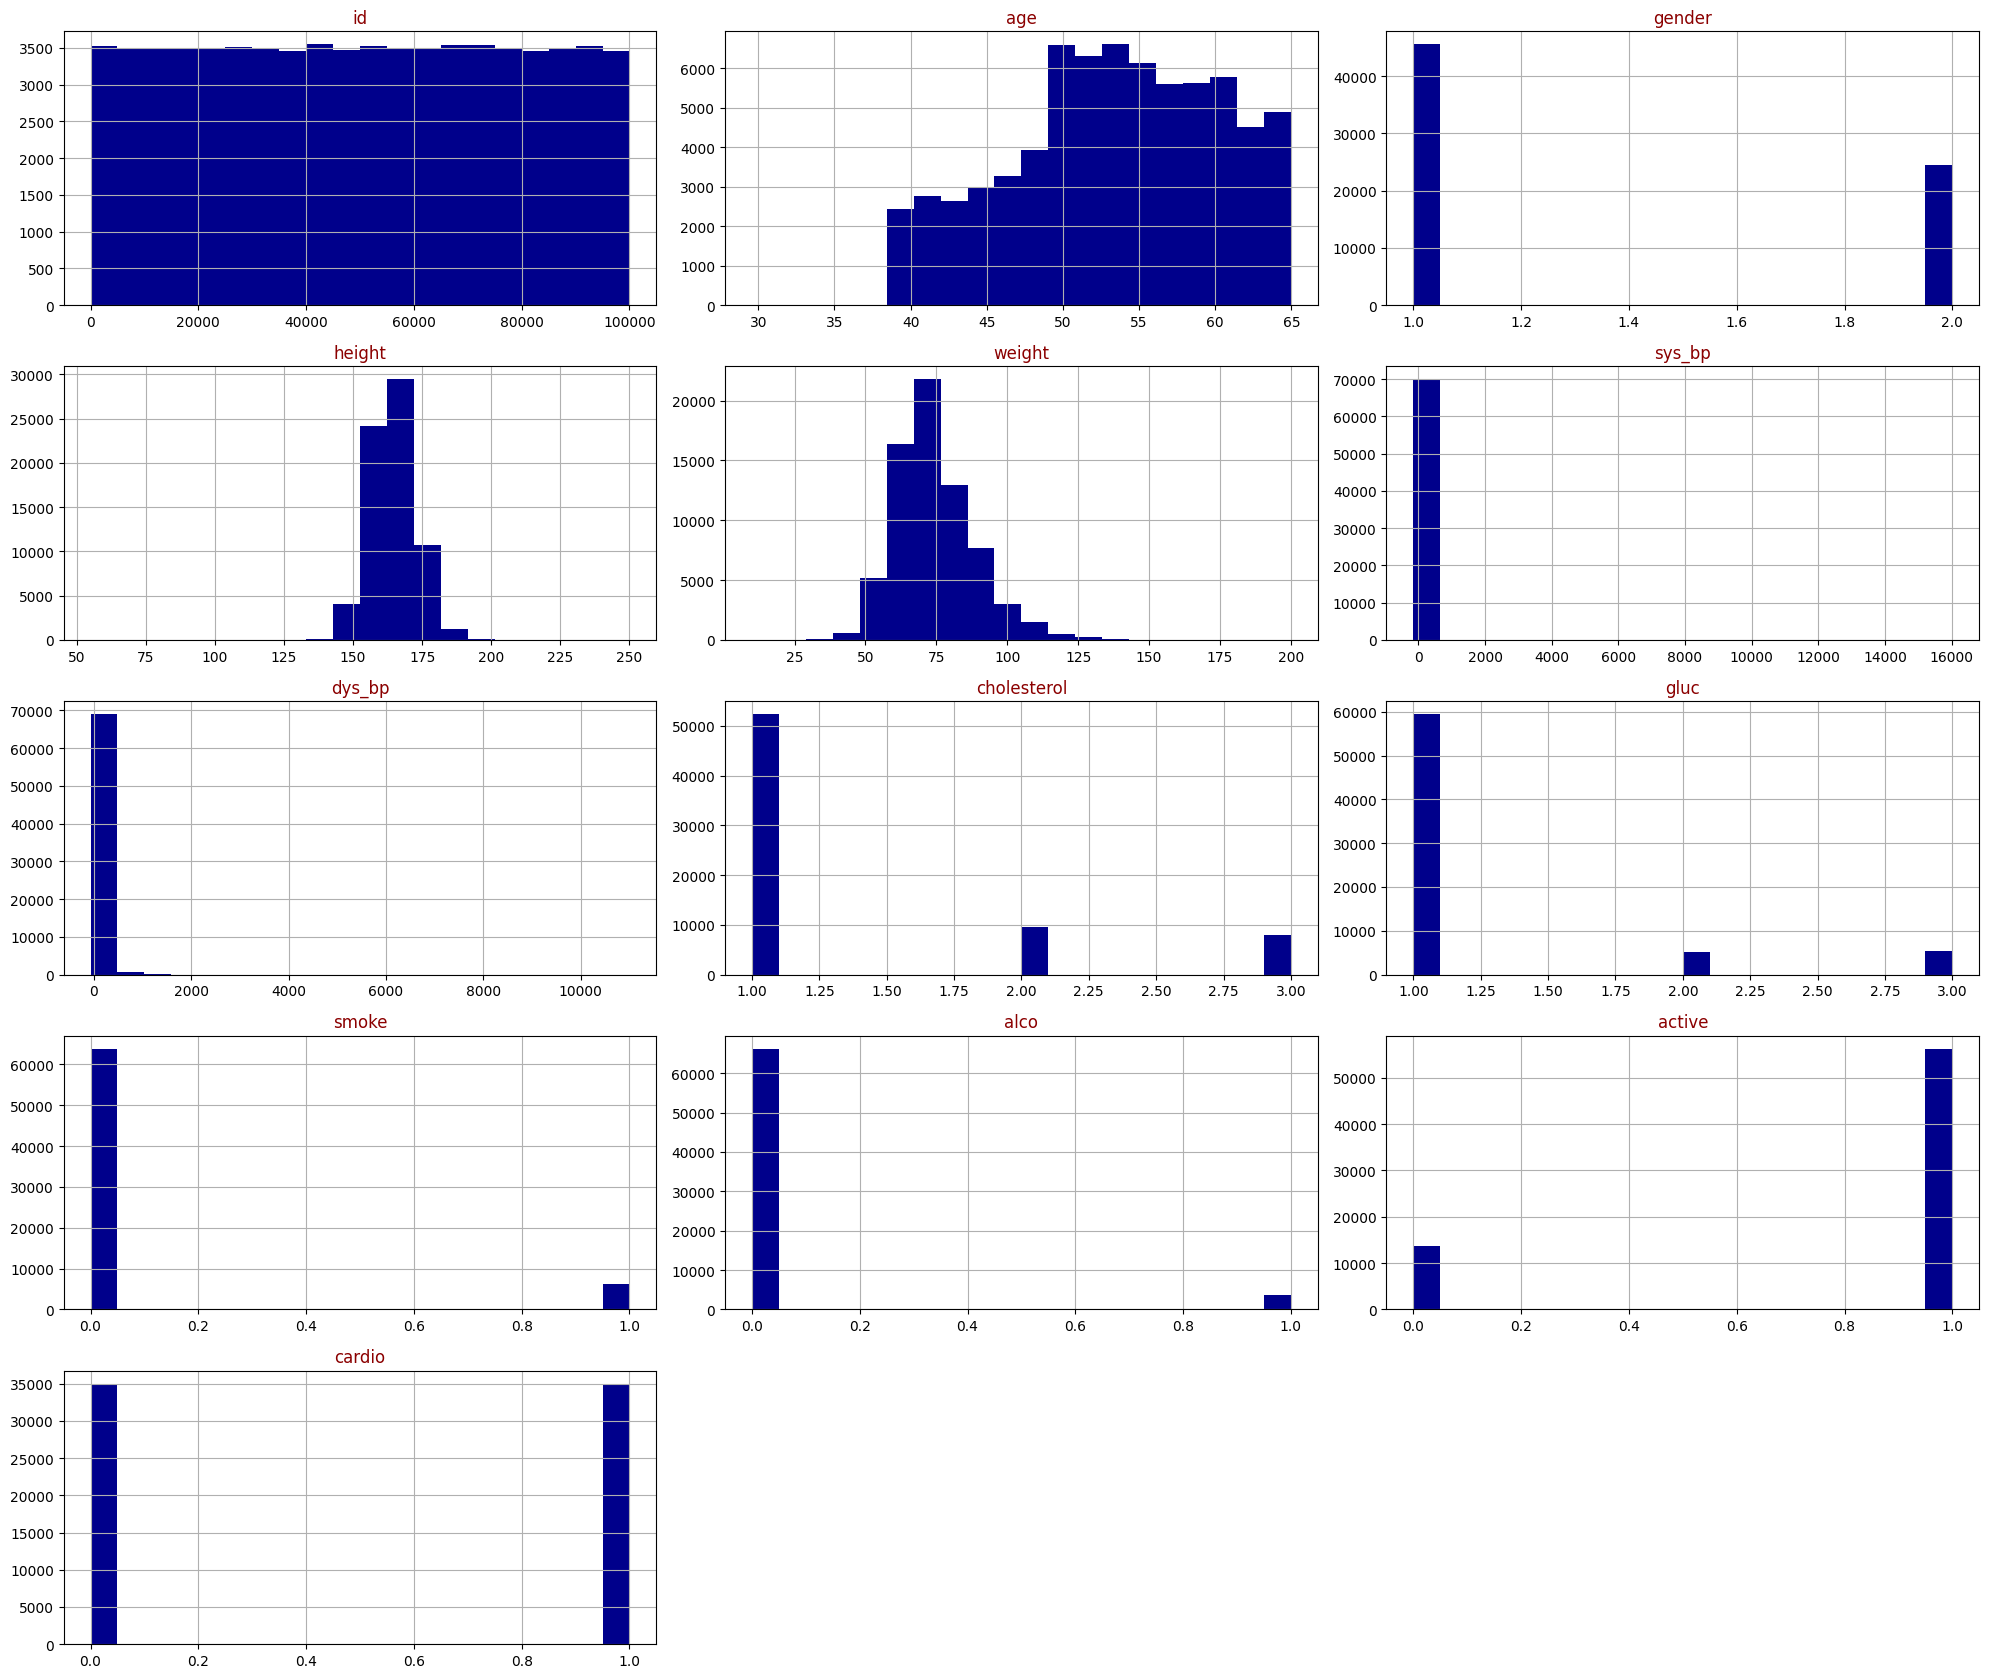

In [47]:
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20, 20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'DarkBlue')
        ax.set_title(feature, color = 'DarkRed')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

*There seems to be some clear outliers, specifically in the sys_bp and dys_bp variables, as you can't have a systolic or dystolic blood pressure over like 400 (highest recorded blood pressure was 370/360). Based on this, we will have to remove some outliers*

**Correlation plot**

<Axes: >

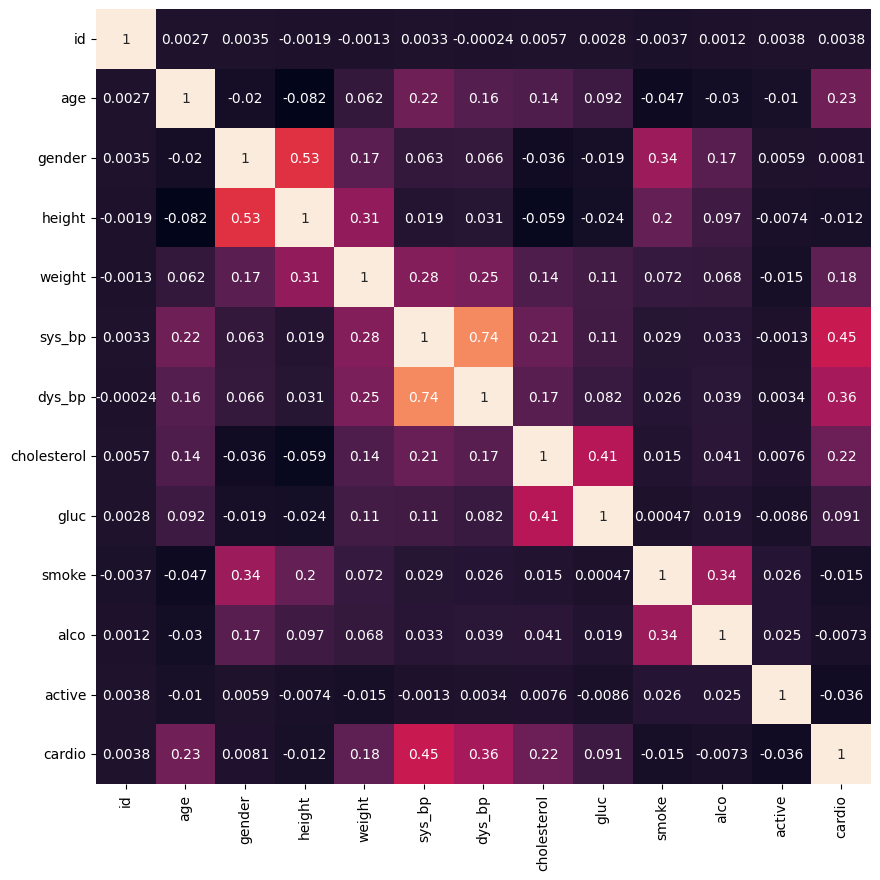

In [48]:
corr = df.corr(method = 'spearman')

plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

*There is some significant correlation between systolic and dystolic blood pressure with having cardiovascular disease. This makes sense as blood pressure can be a easy indicator of heart diseases. Gender has very little correlation, which may point to the fact that a certain gender is not more susceptible to having a cardiovascular disease. Through our research we plan to see if this is true and how features impact gender differently.*

<Axes: >

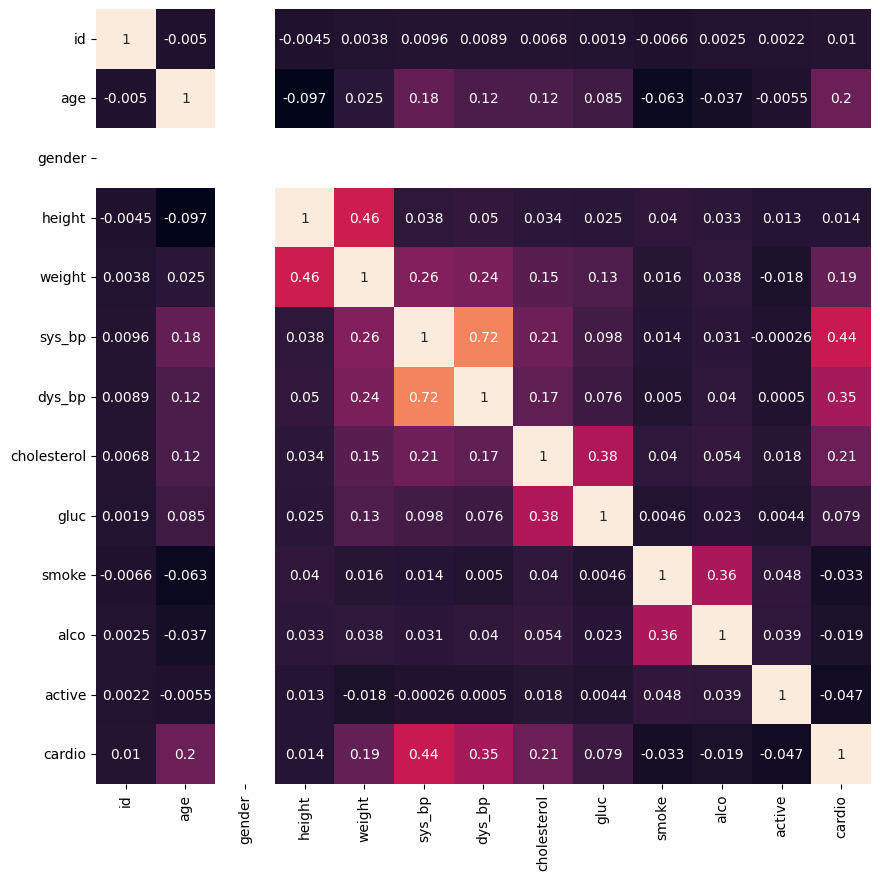

In [49]:
corr = df_men.corr(method = 'spearman')

plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

<Axes: >

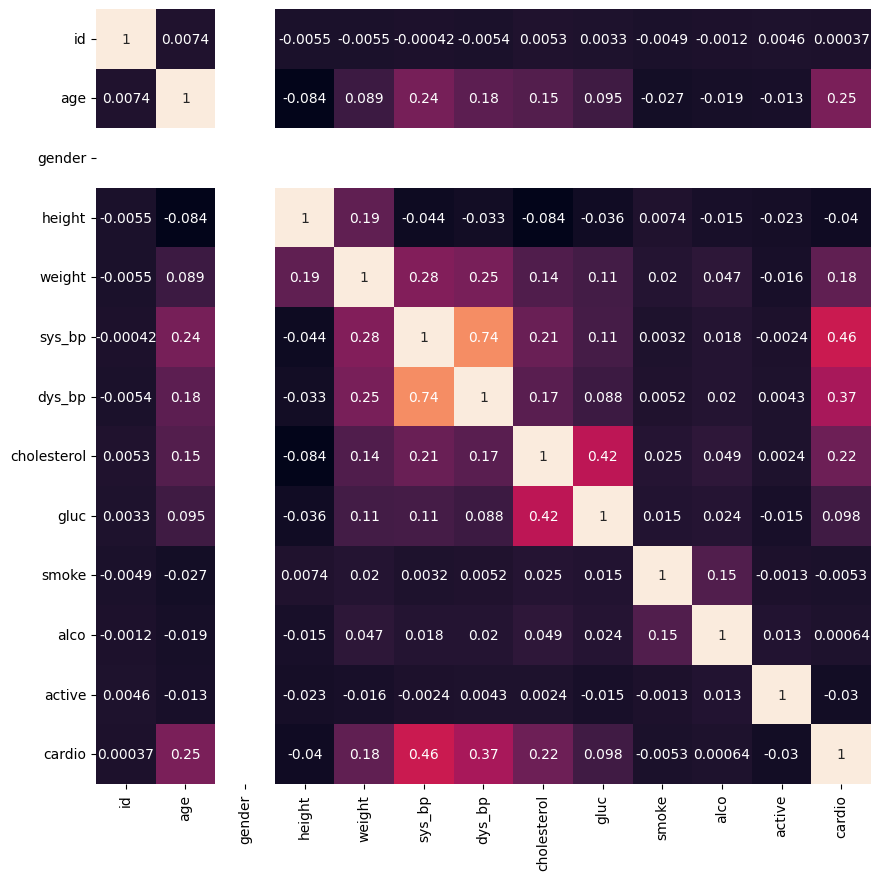

In [50]:
corr = df_women.corr(method = 'spearman')

plt.figure(figsize = (10, 16))
sns.heatmap(corr, square = True, cbar = False, annot = True)

*Comparing the mens vs womens correlation plots, the blood pressure numbers are slightly more correlated with heart disease in women. There were some other small differences in correlation values between variables and the target variable. Alcohol consumption has very little positive correlation (just about zero) with heart disease for women, while it is slightly negative (almost zero too) for men.*

**Missing values**

In [51]:
print('Missing values: ')
print(df.isnull().sum())

mv = np.array(df.isnull().sum())
ta = 0
for t in mv:
    ta += t
print('\nTotal missing attributes: ', ta)

tr = 0
for i in df.isnull().sum(axis = 1):
    if i > 0:
        tr += 1
print('\nTotal rows with missing data: ', tr)

Missing values: 
id             0
age            0
gender         0
height         0
weight         0
sys_bp         0
dys_bp         0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Total missing attributes:  0

Total rows with missing data:  0


*No missing values in the dataset, so no imputation methods will be necessary*

**Generating pairs for Siamese network**

In [ ]:
import random

hd1 = df[df['cardio'] == 1.0].astype('float32')
hd0 = df[df['cardio'] == 0.0].astype('float32')

hd1x = hd1.iloc[:, :-1]
hd1y = hd1.iloc[:, -1]
hd0x = hd0.iloc[:, :-1]
hd0y = hd0.iloc[:, -1]

hd1x = hd1x.to_numpy()
hd1y = hd1y.to_numpy()
hd0x = hd0x.to_numpy()
hd0y = hd0y.to_numpy()

p01 = []
p11 = []
p00 = []


for i in range(len(hd1x)):
    for j in range(len(hd0x)):
        p01 += [[hd0x[j], hd1x[i]]]
for i in range(len(hd1x)):
    for j in range(len(hd1x)):
        p11 += [[hd1x[j], hd1x[i]]]
for i in range(len(hd0x)):
    for j in range(len(hd0x)):
        p00 += [[hd0x[j], hd0x[i]]]

print([len(p01), len(p00), len(p11)])

In [ ]:
p = []
label = []
for i in range(414736):
    t1 = random.randint(0, 2315823)
    t2 = random.randint(0, 12931215)
    p.append(p01[t1])
    label.append(0)
    if i%2 == 0:
        p.append(p00[t2])
        label.append(1)
    else:
        p.append(p11[i])
        label.append(1)

X = np.array(p)
Y = np.array(label)

print([len(X), len(Y)])

In [ ]:
for _ in range(100):
    p = np.random.permutation(829472)
    X = X[p]
    Y = Y[p]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[10:20])

In [ ]:
cc = Counter(y_test)
print(cc[1])
print(cc[0])

**Creating and compiling the neural network**

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import regularizers
# had to change this line slightly because of errors that arised because of outdated syntax
from tensorflow.keras import backend as K
#from keras import backend as K

def create_base_network(input_shape):
    input = Input(shape =  input_shape)
    x = input
    x = Dense(256,
              input_shape = (15,),
              activation='relu',
              name = 'D1')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    x = Dense(256,
              activation='relu',
              name = 'D2')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    x = Dropout(0.2)(x)
    x = Dense(256,
              activation='relu',
              name = 'Embeddings')(x)
              #activity_regularizer = regularizers.l2(0.01))(x)
    return Model(input, x)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis = 1, keepdims = True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    print(shape1)
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [ ]:
input_shape = (15,)
base_network = create_base_network(input_shape)

input_a = Input(shape = input_shape)
input_b = Input(shape = input_shape)

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance,
                  output_shape = eucl_dist_output_shape,
                  name = 'Distance')([processed_a, processed_b])

model = Model([input_a, input_b], distance)

In [ ]:
rms = RMSprop()

model.compile(loss = contrastive_loss,
              optimizer = rms,
              metrics=[accuracy])

model.summary()

**Defining functions to better understanding the training process**

In [ ]:
def stats_avg(history, i):
    val_acc = np.array(history.history['val_accuracy'])
    val_loss = np.array(history.history['val_loss'])
    model_acc = np.array(history.history['accuracy'])
    model_loss = np.array(history.history['loss'])
    print('Average validation loss:', val_loss.sum()/i)
    print('Average validation accuracy:', val_acc.sum()/i)
    print('Average loss:', model_loss.sum()/i)
    print('Average accuracy:', model_acc.sum()/i)

In [ ]:
def plots(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

**Training the network**

In [ ]:
for i in range(1):
    history = model.fit([x_train[:, 0], x_train[:, 1]], y_train,
          batch_size = 512,
          epochs = 64,
          validation_split = 0.25,
          verbose = 1)
    stats_avg(history, 32)
    plots(history)

In [ ]:
save_path_model = 'drive/My Drive/DS340/siamese_model.h5'
model.save(save_path_model)

In [ ]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    print(name, weight)

**Testing and evaluating the model**

In [ ]:
p = np.random.permutation(165895)
x_test = x_test[p]
y_test = y_test[p]

y_pred = model.predict([x_test[:, 0], x_test[:, 1]])
y_pred = (y_pred <= 0.5)

In [ ]:
evaluation = model.evaluate([x_train[:, 0], x_train[:, 1]], y_train)
print('Loss:', evaluation[0])
print('Accuracy:', evaluation[1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted: 0', 'Predicted: 1'],
                           index = ['Actual:0', 'Actual:1'])

print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [0, 1]))